In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('/Users/Kuba/Desktop/Refactored_Py_DS_ML_Bootcamp-master/11-Linear-Regression/USA_Housing.csv')

In [57]:
df.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [58]:
df.tail(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4990,52723.876555,5.452237,8.124571,6.39,14802.088438,4.795006e+05,"86727 Kelly Plaza\nLake Veronica, IL 04474"
4991,74102.191890,5.657841,7.683993,3.13,24041.270592,1.263721e+06,"2871 John Lodge\nAmychester, GU 61734-5597"
4992,87499.125743,6.403473,4.836091,4.02,40815.199679,1.568701e+06,Unit 2096 Box 9559\nDPO AE 80983-8797
4993,69639.140896,5.007510,7.778375,6.05,54056.128430,1.381831e+06,"5259 David Causeway Apt. 975\nSouth Alexstad, ..."
4994,73060.846226,5.293682,6.312253,4.16,22695.695480,9.053549e+05,"5224 Lamb Passage\nNancystad, GA 16579"
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [12]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [14]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# Simple plots:

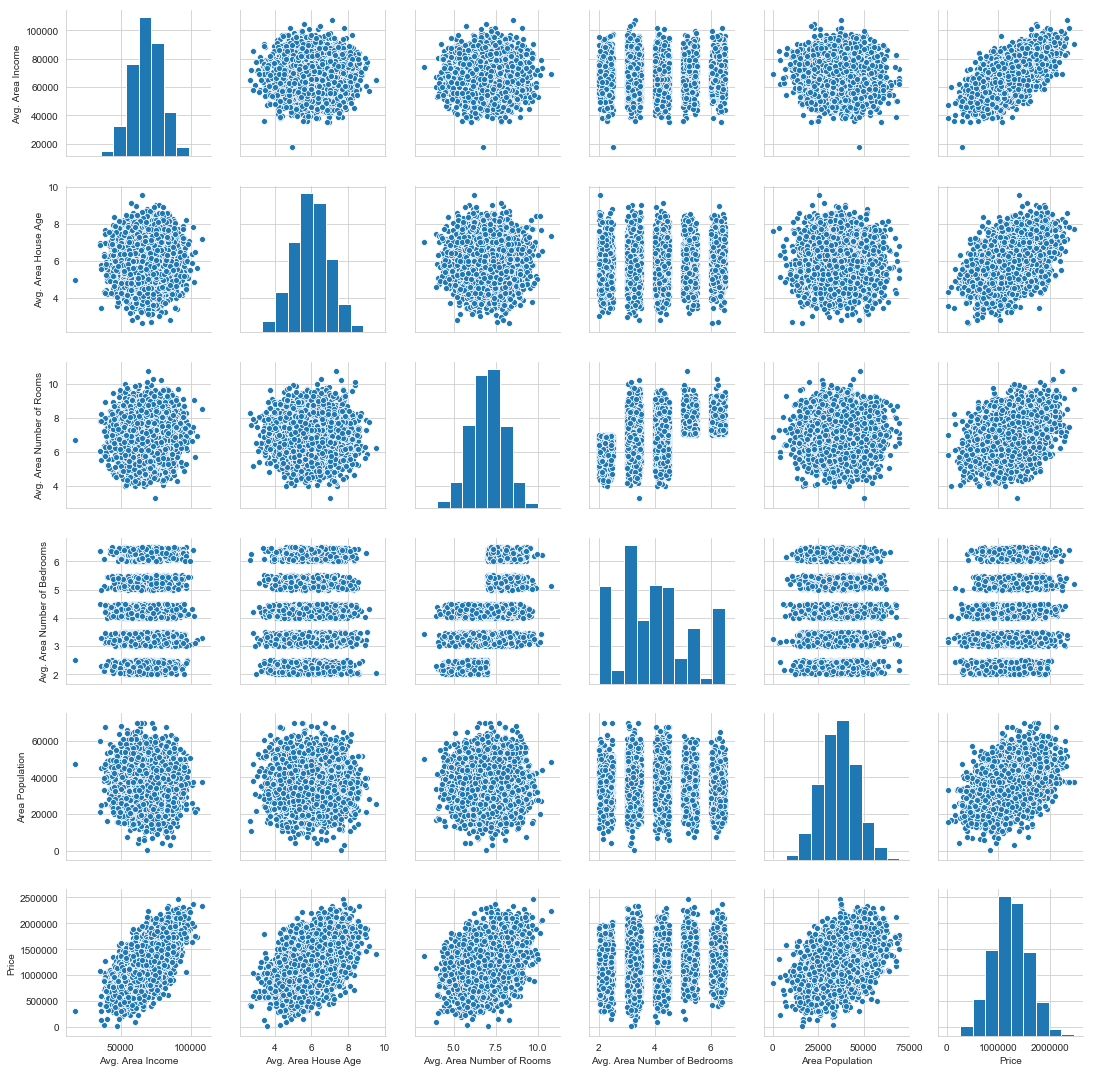

In [17]:
sns.set_style('whitegrid')
sns.pairplot(df)

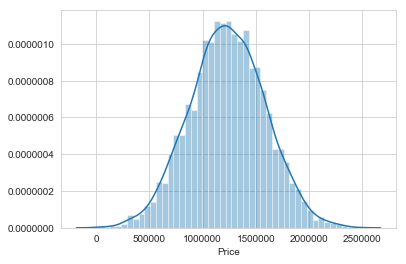

In [18]:
sns.distplot(df['Price'])

# Correlation:

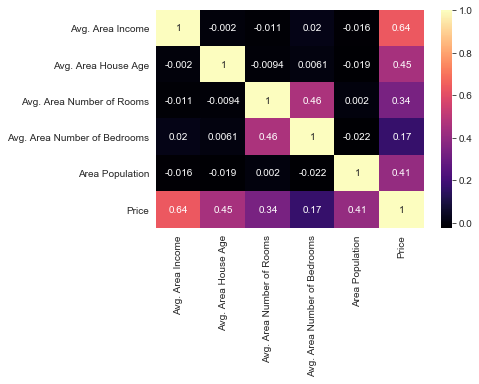

In [22]:
sns.heatmap(df.corr(), annot = True, cmap = 'magma')

Conlusion:

Price is the most correlated with Avg.AreaIncome in direct proportion and the least correlated with Avg. number of bedrooms.
Very interesting fact is that Area Population is very poorly correlated with avg. area income.

# Training a Linear Regression Model

In [24]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [36]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

In [37]:
y = df['Price']

In [38]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=101)

In [39]:
lm = LinearRegression()

In [40]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
print(lm.intercept_)

-2640159.7968525263


In [42]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [43]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])

In [44]:
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

# Predictions from our Model

In [45]:
predictions = lm.predict(X_test)

In [66]:
pdf = pd.DataFrame(data = [predictions, y_test, predictions-y_test], index = ['Predictions', 'Real Values', 'Difference'])

In [69]:
pdf.transpose().head(10)

,Predictions,Real Values,Difference
0,1.260961e+06,1.251689e+06,9272.089973
1,8.275888e+05,8.730483e+05,-45459.564039
2,1.742421e+06,1.696978e+06,45443.579711
3,9.746254e+05,1.063964e+06,-89338.900475
4,9.987178e+05,9.487883e+05,49929.566310
5,6.457541e+05,7.300436e+05,-84289.556693
6,1.083216e+06,1.166925e+06,-83709.236994
7,8.553349e+05,7.054441e+05,149890.831933
8,1.445671e+06,1.499989e+06,-54317.479217
9,1.202846e+06,1.288199e+06,-85353.138339


Text(0, 0.5, 'Real values')

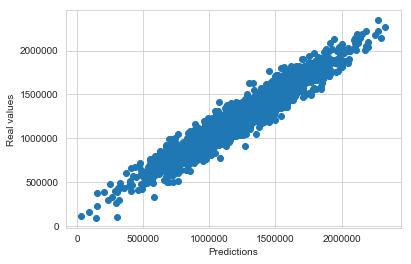

In [48]:
plt.scatter(y_test, predictions)
plt.xlabel('Predictions')
plt.ylabel('Real values')

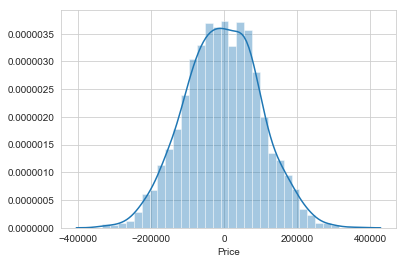

In [50]:
sns.distplot((y_test-predictions))

In [51]:
from sklearn import metrics

In [52]:
metrics.mean_absolute_error(y_test, predictions)

82288.22251914948

In [53]:
metrics.mean_squared_error(y_test, predictions)

10460958907.209064

In [54]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.8292229094

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.